 # PROGRAMMING FOR DATA ANALYTICS, FINAL PROJECT
 NAME :Chinedu Muolokwu-K00277637
 NAME :Treasy Muriuki-K00277638

# Task 3

Project Objectives
1. Describe the dataset using the most important variables
2. Compare activities across random stations – (any choice of 6 stations) ,do all the stations have same level of activity?
3. Explore bike activity on weekdays versus weekends, are weekdays busier? 
4. How does bike activity compare across stations during the peak and off-peak period, is it peak/off-peak for all stations at the same time? 
5. What are the overall top five busiest stations?
6. Do most stations have payments systems installed (banking)
7. Compare bike activity on a bank holiday vs a typical day, are fewer bikes used over bank holidays?


In [238]:
#Import Libraries
import pandas as pd
import numpy as np
import glob
import os
import ast
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
# merging the files
joined_bike_data = os.path.join(r"C:\Users\CHINEDU\Documents\FINAL_LUXEM_BIKE_DATA", "*.csv")

# Return a list of all joined files
list_bike_data = glob.glob(joined_bike_data)

print("** Merging multiple csv files into a single pandas dataframe **")
# Merge files by joining all files
full_bike_data = pd.concat(map(pd.read_csv, list_bike_data), ignore_index=False)

full_bike_data.to_csv(r"C:\Users\CHINEDU\Documents\full_bike_data.csv", na_rep='NULL')
full_bike_data


** Merging multiple csv files into a single pandas dataframe **


,Unnamed: 0,number,contractName,name,address,position,banking,bonus,status,lastUpdate,connected,overflow,shape,totalStands,mainStands,overflowStands
0,0,53,luxembourg,#00053-LUDWIG VAN BEETHOVEN,- LUDWIG VAN BEETHOVEN - RUE LUDWIG VAN BEETHO...,"{'latitude': 49.59, 'longitude': 6.1172}",False,False,OPEN,2022-04-09T10:19:17Z,True,False,NaN,"{'availabilities': {'bikes': 9, 'stands': 11, ...","{'availabilities': {'bikes': 9, 'stands': 11, ...",NaN
1,1,24,luxembourg,#00024-WEICKER,WEICKER - AVENUE JF KENNEDY / RUE ALPHONSE WEI...,"{'latitude': 49.631952, 'longitude': 6.17048}",False,False,OPEN,2022-04-09T10:14:50Z,True,False,NaN,"{'availabilities': {'bikes': 4, 'stands': 16, ...","{'availabilities': {'bikes': 4, 'stands': 16, ...",NaN
2,2,102,luxembourg,#00102-FENTANGE HIEHL,"FENTANGE ""Hiehl"" - RUE DE BETTEMBOURG DEVANT N°75","{'latitude': 49.567771, 'longitude': 6.152463}",False,False,OPEN,2022-04-09T10:15:10Z,True,False,NaN,"{'availabilities': {'bikes': 5, 'stands': 8, '...","{'availabilities': {'bikes': 5, 'stands': 8, '...",NaN
3,3,88,luxembourg,#00088-SERRA,SERRA - AVENUE J.F. KENNEDY / CIRCUIT DE LA FO...,"{'latitude': 49.635423, 'longitude': 6.176061}",True,False,OPEN,2022-04-09T10:17:35Z,True,False,NaN,"{'availabilities': {'bikes': 8, 'stands': 22, ...","{'availabilities': {'bikes': 8, 'stands': 22, ...",NaN
4,4,6,luxembourg,#00006-AL BRÉCK,AL BRÉCK - VIADUC / BOULEVARD DE LA PETRUSSE,"{'latitude': 49.60481, 'longitude': 6.133404}",False,False,OPEN,2022-04-09T10:18:25Z,True,False,NaN,"{'availabilities': {'bikes': 0, 'stands': 14, ...","{'availabilities': {'bikes': 0, 'stands': 14, ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,111,42,luxembourg,#00042-SQUARE ANDRE,SQUARE ANDRE - SQUARE EDOUARD ANDRE ( DEVANT N...,"{'latitude': 49.6238, 'longitude': 6.1188}",False,False,OPEN,2022-04-19T10:05:21Z,True,False,NaN,"{'availabilities': {'bikes': 0, 'stands': 19, ...","{'availabilities': {'bikes': 0, 'stands': 19, ...",NaN
112,112,100,luxembourg,#00100-FORT NIEDERGRÜNEWALD,FORT NIEDERGRÜNEWALD - RUE DU FORT NIEDERGRÜNE...,"{'latitude': 49.619439, 'longitude': 6.140894}",False,False,OPEN,2022-04-19T10:06:26Z,True,False,NaN,"{'availabilities': {'bikes': 3, 'stands': 17, ...","{'availabilities': {'bikes': 3, 'stands': 17, ...",NaN
113,113,64,luxembourg,#00064-GRENIER,GRENIER - RUE EDOUARD GRENIER,"{'latitude': 49.59383, 'longitude': 6.14327}",False,False,OPEN,2022-04-19T10:06:48Z,True,False,NaN,"{'availabilities': {'bikes': 1, 'stands': 18, ...","{'availabilities': {'bikes': 1, 'stands': 18, ...",NaN
114,114,46,luxembourg,#00046-LONKECHER STROOSS,LONKECHER STROOSS - ROUTE DE LONGWY ( DEVANT N...,"{'latitude': 49.60563, 'longitude': 6.10003}",False,False,OPEN,2022-04-19T10:07:52Z,True,False,NaN,"{'availabilities': {'bikes': 0, 'stands': 15, ...","{'availabilities': {'bikes': 0, 'stands': 15, ...",NaN


In [253]:
#Import the data
full_bike_data = pd.read_csv(r"C:\Users\CHINEDU\Documents\full_bike_data.csv")

#Extract the Longitiude and Latitude from the position column
full_bike_data["position"] =  full_bike_data["position"].map(lambda d : ast.literal_eval(d))
Bike_position = pd.DataFrame(full_bike_data["position"].to_dict()).T

#Extract the information in the Total Stands Columns
full_bike_data["totalStands"] =  full_bike_data["totalStands"].map(lambda d : ast.literal_eval(d))
Bike_position_1 = pd.DataFrame(full_bike_data["totalStands"].to_dict()).T

# #Further Extract the information from availabilities
Bike_position_1 =Bike_position_1.join(pd.DataFrame(Bike_position_1["availabilities"].to_dict()).T).join(Bike_position)

# #drop unwanted columns from the newly formed attributes
new_bike_columns = Bike_position_1.drop(['availabilities','mechanicalBikes','electricalBikes','electricalInternalBatteryBikes','electricalRemovableBatteryBikes'], axis = 1)
new_bike_columns

,capacity,bikes,stands,latitude,longitude
0,20,9,11,49.590000,6.117200
1,20,4,16,49.631952,6.170480
2,14,5,8,49.567771,6.152463
3,30,8,22,49.635423,6.176061
4,15,0,14,49.604810,6.133404
...,...,...,...,...,...
9517,20,0,19,49.623800,6.118800
9518,20,3,17,49.619439,6.140894
9519,20,1,18,49.593830,6.143270
9520,15,0,15,49.605630,6.100030


In [254]:
# Join the new data to the original table
bike_data = full_bike_data.join(new_bike_columns)

# Drop unimportant columns
bike_data = bike_data.drop(['position','Unnamed: 0','Unnamed: 0.1','totalStands','mainStands',], axis = 1)

# Delete Duplicates 
bike_data.drop_duplicates(keep= 'first',inplace=True)

# #get date and time columns
bike_data['DATETIME'] = [dt.datetime.strptime(d, "%Y-%m-%dT%H:%M:%SZ") for d in bike_data["lastUpdate"]]
bike_data['lastUpdate'] = [dt.datetime.time(d) for d in bike_data['DATETIME']] 
bike_data['DATE'] = [dt.datetime.date(d) for d in bike_data['DATETIME']] 

# # Change the some columns
bike_data.iloc[:,12:15] = bike_data.iloc[:,12:15].astype(float)

# #feature engineering
bike_data['OCCUPANCY_PCT'] =  bike_data['bikes'] / bike_data['capacity']
bike_data['IN_CIRCULATION_PCT'] =  bike_data['stands'] / bike_data['capacity']


#  create time aggregates needed for clustering
# # weekday/saturday/sunday
bike_data['DAY_NUMBER'] = bike_data.DATETIME.dt.dayofweek
bike_data['DAY_TYPE'] = np.where(bike_data['DAY_NUMBER'] <= 4, 'Weekday', 'Weekend')

# Rename Columns
bike_data=bike_data.rename(columns= {"number":"NUMBER","contractName":"CONTRACT_NAME","address":"ADDRESS",'banking':'BANKING',"bonus":"BONUS","status":"STATUS",
                                     "lastUpdate":"LAST_UPDATE","connected":"CONNECTED","overflow":"OVERFLOW","shape":"SHAPE","overflowStands":"OVERFLOW_STANDS",
                                     "capacity":"CAPACITY","bikes":"AVAILABLE_BIKES","stands":"EMPTY_STANDS", "name":"NAME","longitude":"LONGITUDE","latitude":"LATITUDE"})

#Save the Csv file
bike_data.to_csv(r"C:\Users\CHINEDU\Documents\Final_Bike_Dataset.csv", na_rep='NULL')

bike_data.head()

,NUMBER,CONTRACT_NAME,NAME,ADDRESS,BANKING,BONUS,STATUS,LAST_UPDATE,CONNECTED,OVERFLOW,...,AVAILABLE_BIKES,EMPTY_STANDS,LATITUDE,LONGITUDE,DATETIME,DATE,OCCUPANCY_PCT,IN_CIRCULATION_PCT,DAY_NUMBER,DAY_TYPE
0,53,luxembourg,#00053-LUDWIG VAN BEETHOVEN,- LUDWIG VAN BEETHOVEN - RUE LUDWIG VAN BEETHO...,False,False,OPEN,10:19:17,True,False,...,9.0,11.0,49.590000,6.117200,2022-04-09 10:19:17,2022-04-09,0.450000,0.550000,5,Weekend
1,24,luxembourg,#00024-WEICKER,WEICKER - AVENUE JF KENNEDY / RUE ALPHONSE WEI...,False,False,OPEN,10:14:50,True,False,...,4.0,16.0,49.631952,6.170480,2022-04-09 10:14:50,2022-04-09,0.200000,0.800000,5,Weekend
2,102,luxembourg,#00102-FENTANGE HIEHL,"FENTANGE ""Hiehl"" - RUE DE BETTEMBOURG DEVANT N°75",False,False,OPEN,10:15:10,True,False,...,5.0,8.0,49.567771,6.152463,2022-04-09 10:15:10,2022-04-09,0.357143,0.571429,5,Weekend
3,88,luxembourg,#00088-SERRA,SERRA - AVENUE J.F. KENNEDY / CIRCUIT DE LA FO...,True,False,OPEN,10:17:35,True,False,...,8.0,22.0,49.635423,6.176061,2022-04-09 10:17:35,2022-04-09,0.266667,0.733333,5,Weekend
4,6,luxembourg,#00006-AL BRÉCK,AL BRÉCK - VIADUC / BOULEVARD DE LA PETRUSSE,False,False,OPEN,10:18:25,True,False,...,0.0,14.0,49.604810,6.133404,2022-04-09 10:18:25,2022-04-09,0.000000,0.933333,5,Weekend


In [256]:
#We are dealing with real-time data here and sometimes, when we take our data at exactly 17:00pm for example, the last update could range
#between 16:57pm and 17:00pm. This might cause some data to fall for 4pm and some for 5pm. So we had to create a range of conditional
#statement to take care of that

# Select the necessary date and time columns
bike_data_wrangled = bike_data[['DATETIME',"DATE"]]

#define a function to place them in range
def bin_time(x):
    if x.time() > dt.time(5,50,0) and x.time() < dt.time(6,30,0):
        return 7
    elif x.time() > dt.time(6,50,0) and x.time() < dt.time(7,30,0):
        return 7
    elif x.time() > dt.time(7,50,0) and x.time() < dt.time(8,30,0):
        return 8
    elif x.time() > dt.time(8,40,0) and x.time() < dt.time(9,30,0):
        return 9
    elif x.time() > dt.time(9,50,0) and x.time() < dt.time(10,30,0):
        return 10
    elif x.time() > dt.time(10,50,0) and x.time() < dt.time(11,30,0):
        return 11
    elif x.time() > dt.time(11,50,0) and x.time() < dt.time(12,49,0):
        return 12
    elif x.time() > dt.time(12,50,0) and x.time() < dt.time(13,30,0):
        return 13
    elif x.time() > dt.time(13,50,0) and x.time() < dt.time(14,30,0):
        return 14
    elif x.time() > dt.time(14,50,0) and x.time() < dt.time(15,30,0):
        return 15
    elif x.time() > dt.time(15,50,0) and x.time() < dt.time(16,40,0):
        return 16
    elif x.time() > dt.time(16,40,0) and x.time() < dt.time(17,40,0):
        return 17
    elif x.time() > dt.time(17,50,0) and x.time() < dt.time(18,30,0):
        return 18
    elif x.time() > dt.time(18,50,0) and x.time() < dt.time(19,30,0):
        return 19
    elif x.time() > dt.time(19,40,0) and x.time() < dt.time(20,30,0):
        return 20
    elif x.time() > dt.time(20,50,0) and x.time() < dt.time(21,30,0):
        return 21
    elif x.time() > dt.time(21,50,0) and x.time() < dt.time(22,30,0):
        return 22
    elif x.time() > dt.time(22,50,0) and x.time() < dt.time(23,30,0):
        return 23
    elif x.time() > dt.time(23,50,0) and x.time() < dt.time(23,59,59):
        return 0
    else:
        return 99
bike_data_datetime = bike_data_wrangled['DATETIME']

bike_data_wrangled['HOUR'] = bike_data_datetime.apply(bin_time)
# df_25[(df_25['type'] == 15)]

bike_data_wrangled

bike_data_wrangled.to_csv(r"C:\Users\CHINEDU\Documents\Easter\Final_one_.csv", na_rep='NULL')

C:\Users\CHINEDU\AppData\Local\Temp/ipykernel_11656/3735392255.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data_wrangled['HOUR'] = bike_data_datetime.apply(bin_time)


In [257]:
#Join 
bike_data = bike_data.join(bike_data_wrangled['HOUR'])
bike_data

,NUMBER,CONTRACT_NAME,NAME,ADDRESS,BANKING,BONUS,STATUS,LAST_UPDATE,CONNECTED,OVERFLOW,...,EMPTY_STANDS,LATITUDE,LONGITUDE,DATETIME,DATE,OCCUPANCY_PCT,IN_CIRCULATION_PCT,DAY_NUMBER,DAY_TYPE,HOUR
0,53,luxembourg,#00053-LUDWIG VAN BEETHOVEN,- LUDWIG VAN BEETHOVEN - RUE LUDWIG VAN BEETHO...,False,False,OPEN,10:19:17,True,False,...,11.0,49.590000,6.117200,2022-04-09 10:19:17,2022-04-09,0.450000,0.550000,5,Weekend,10
1,24,luxembourg,#00024-WEICKER,WEICKER - AVENUE JF KENNEDY / RUE ALPHONSE WEI...,False,False,OPEN,10:14:50,True,False,...,16.0,49.631952,6.170480,2022-04-09 10:14:50,2022-04-09,0.200000,0.800000,5,Weekend,10
2,102,luxembourg,#00102-FENTANGE HIEHL,"FENTANGE ""Hiehl"" - RUE DE BETTEMBOURG DEVANT N°75",False,False,OPEN,10:15:10,True,False,...,8.0,49.567771,6.152463,2022-04-09 10:15:10,2022-04-09,0.357143,0.571429,5,Weekend,10
3,88,luxembourg,#00088-SERRA,SERRA - AVENUE J.F. KENNEDY / CIRCUIT DE LA FO...,True,False,OPEN,10:17:35,True,False,...,22.0,49.635423,6.176061,2022-04-09 10:17:35,2022-04-09,0.266667,0.733333,5,Weekend,10
4,6,luxembourg,#00006-AL BRÉCK,AL BRÉCK - VIADUC / BOULEVARD DE LA PETRUSSE,False,False,OPEN,10:18:25,True,False,...,14.0,49.604810,6.133404,2022-04-09 10:18:25,2022-04-09,0.000000,0.933333,5,Weekend,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,42,luxembourg,#00042-SQUARE ANDRE,SQUARE ANDRE - SQUARE EDOUARD ANDRE ( DEVANT N...,False,False,OPEN,10:05:21,True,False,...,19.0,49.623800,6.118800,2022-04-19 10:05:21,2022-04-19,0.000000,0.950000,1,Weekday,10
9518,100,luxembourg,#00100-FORT NIEDERGRÜNEWALD,FORT NIEDERGRÜNEWALD - RUE DU FORT NIEDERGRÜNE...,False,False,OPEN,10:06:26,True,False,...,17.0,49.619439,6.140894,2022-04-19 10:06:26,2022-04-19,0.150000,0.850000,1,Weekday,10
9519,64,luxembourg,#00064-GRENIER,GRENIER - RUE EDOUARD GRENIER,False,False,OPEN,10:06:48,True,False,...,18.0,49.593830,6.143270,2022-04-19 10:06:48,2022-04-19,0.050000,0.900000,1,Weekday,10
9520,46,luxembourg,#00046-LONKECHER STROOSS,LONKECHER STROOSS - ROUTE DE LONGWY ( DEVANT N...,False,False,OPEN,10:07:52,True,False,...,15.0,49.605630,6.100030,2022-04-19 10:07:52,2022-04-19,0.000000,1.000000,1,Weekday,10


In [275]:
selected_bike_columns = bike_data[['CONTRACT_NAME', 'NAME','CAPACITY', 'BANKING','AVAILABLE_BIKES', 'EMPTY_STANDS','OCCUPANCY_PCT', 'IN_CIRCULATION_PCT', 'DATE', 'DAY_TYPE','DAY_NUMBER','HOUR']]


1. summary statistics for our important variables


In [274]:
selected_bike_columns.describe()

,CAPACITY,AVAILABLE_BIKES,EMPTY_STANDS,OCCUPANCY_PCT,IN_CIRCULATION_PCT,DAY_NUMBER,HOUR
count,9279.000000,9279.000000,9279.000000,9279.000000,9279.000000,9279.000000,9279.000000
mean,19.438086,6.895355,11.767540,0.360186,0.600397,2.662464,14.591228
std,3.297202,4.702366,5.371975,0.238672,0.243069,1.942836,5.345354
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,3.000000,8.000000,0.150000,0.440000,1.000000,10.000000
50%,20.000000,7.000000,12.000000,0.350000,0.600000,2.000000,15.000000
75%,20.000000,10.000000,16.000000,0.533333,0.800000,4.000000,19.000000
max,35.000000,35.000000,32.000000,1.000000,1.000000,6.000000,99.000000


2. Compare activities across random stations – (any choice of 6 stations) ,do all the stations have same level of activity?

<AxesSubplot:xlabel='Time of the Day', ylabel='Cycles in Circulation'>

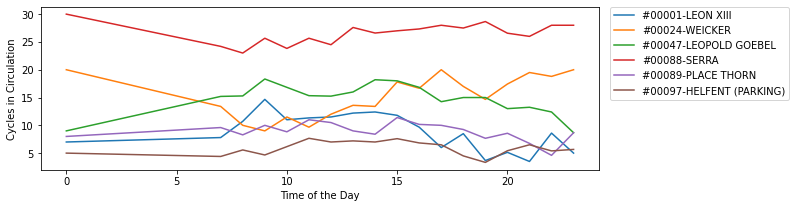

In [259]:
bike_data_byStations= selected_bike_columns[selected_bike_columns['NAME'].isin(['#00024-WEICKER','#00001-LEON XIII','#00089-PLACE THORN','#00047-LEOPOLD GOEBEL', 
                                 '#00097-HELFENT (PARKING)','#00088-SERRA'])].groupby(['NAME','HOUR']).agg(
    {
         'OCCUPANCY_PCT': "mean",    #average of Occupancy_Percentage grouped by Station Name 
         'EMPTY_STANDS': 'mean'           #average of Stands grouped by Station Name    
    }
)
bike_data_byStations_plot = bike_data_byStations.pivot_table(index='HOUR', columns='NAME', values='EMPTY_STANDS', aggfunc='mean').plot()
plt.ylabel("Cycles in Circulation")
plt.xlabel("Time of the Day")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
bike_data_byStations_plot


3. Explore bike activity on weekdays versus weekends, are weekdays busier? 

C:\Users\CHINEDU\AppData\Local\Temp/ipykernel_11656/1956448606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_bike_columns['EVEN_ODD'] = np.where(selected_bike_columns['HOUR'] % 2 == 0,'Even','Odd')


Text(0.5, 0, 'Time of the Day')

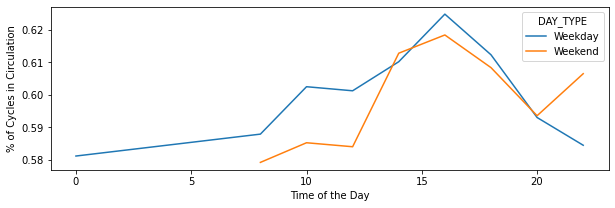

In [260]:
# Select only even times if the day
plt.rcParams["figure.figsize"] = (10,3)
selected_bike_columns['EVEN_ODD'] = np.where(selected_bike_columns['HOUR'] % 2 == 0,'Even','Odd')
selected_bike_plotTime = selected_bike_columns[(selected_bike_columns['EVEN_ODD'] == 'Even')]

#Group by the Day Type and Aggregate
bike_groupby_dayType= selected_bike_plotTime.groupby(['DAY_TYPE','HOUR']).agg(
    {
         'OCCUPANCY_PCT': "mean", # average of Occupancy_Percentage grouped by Day Type
         'IN_CIRCULATION_PCT':'mean' #average of In Circulation Percentage grouped by Day Type   
    }
)

#Plot the distribution
bike_dayType_plot = bike_groupby_dayType.pivot_table(index='HOUR', columns='DAY_TYPE', values='IN_CIRCULATION_PCT').plot()
plt.ylabel("% of Cycles in Circulation")
plt.xlabel("Time of the Day")

4. How does bike activity compare across stations during the peak and off-peak period, is it peak/off-peak for all stations at the same time? 

In [262]:
bike_data_byStation_5pm= selected_bike_columns[(selected_bike_columns['HOUR'] == 17)].groupby(['NAME']).agg(
    {   
         'IN_CIRCULATION_PCT': 'mean' # average of Stands grouped by Station Name     
    }).sort_values(by=['IN_CIRCULATION_PCT'],ascending=False)


bike_data_byStation_11am= selected_bike_columns[(selected_bike_columns['HOUR'] == 11)].groupby(['NAME']).agg(
    {   
         'IN_CIRCULATION_PCT': 'mean' # average of Stands grouped by Station Name     
    }).sort_values(by=['IN_CIRCULATION_PCT'],ascending=False)
# bike_data_byStation_11am
bike_data_byStation_5pm
bike_data_byStation_11am_5pm = bike_data_byStation_5pm.join(bike_data_byStation_11am,how = 'left', lsuffix=' 5pm', rsuffix=' 11am')
bike_data_byStation_11am_5pm

,IN_CIRCULATION_PCT 5pm,IN_CIRCULATION_PCT 11am
NAME,,
#00024-WEICKER,1.000000,0.483333
#00032-PISCINE OLYMPIQUE,0.962500,0.850000
#00016-AMELIE,0.962500,0.416667
#00048-BGL BNP PARIBAS,0.962500,0.716667
#00087-NATIONALBIBLIOTHEIK,0.950000,0.416667
...,...,...
#00114-ROND-POINT MOTEL,0.250000,0.333333
#00115-CENTRE CULTUREL CAP,0.250000,0.288889
#00057-BOUILLON,0.228571,0.628571


5. What are the overall top five busiest stations?

In [261]:
# Group Data by the Top 5 Busiest stations
bike_data_byStation= selected_bike_columns.groupby(['NAME']).agg(
    {   
         'IN_CIRCULATION_PCT': 'mean'      
    }).sort_values(by=['IN_CIRCULATION_PCT'],ascending=False).head()

bike_data_byStation


,IN_CIRCULATION_PCT
NAME,
#00023-REIMERWEE,0.895833
#00088-SERRA,0.874583
#00032-PISCINE OLYMPIQUE,0.846250
#00028-CHARLY'S GARE,0.835000
#00021-JEAN MONNET,0.808750


6. Do most stations have payments systems installed (banking)

In [263]:
# df.groupby(['group']).agg(['min', 'max', 'count', 'nunique'])
selected_bike_columns.groupby(['BANKING']).agg({   
         'NAME': 'nunique' # distinct count of bike name    
    })

,NAME
BANKING,
False,107
True,12


7. Compare bike activity on a bank holiday vs a typical day, are fewer bikes used over bank holidays?

In [273]:
bike_data_byStation_bankHoliday= selected_bike_columns[(selected_bike_columns['DAY_NUMBER'] == 4)].groupby(['NAME']).agg(
    {   
         'IN_CIRCULATION_PCT': 'mean'   
    })
bike_data_byStation_normalWorkDay= selected_bike_columns[(selected_bike_columns['DAY_NUMBER'] == 2)].groupby(['NAME']).agg(
    {   
         'IN_CIRCULATION_PCT': 'mean'   
    })

bike_data_byStation_bankHoliday
bike_data_both = bike_data_byStation_bankHoliday.join(bike_data_byStation_normalWorkDay,how = 'left', lsuffix='Bank', rsuffix=' Normal')
bike_data_both

,IN_CIRCULATION_PCTBank,IN_CIRCULATION_PCT Normal
NAME,,
#00001-LEON XIII,0.450000,0.446154
#00002-GARE CENTRALE 2,0.328042,0.575092
#00003-STROOSSBUERGER PLAZ,0.627778,0.561538
#00004-ROCADE,0.694444,0.796154
#00005-PARAISER PLAZ,0.577778,0.544615
...,...,...
#00113-EDEMER,0.300000,0.500000
#00114-ROND-POINT MOTEL,0.326389,0.331731
#00115-CENTRE CULTUREL CAP,0.311111,0.276923


# Conclusion

    At the begining on this project, we set out collect data and to explore the same to fulfil our set objectives, below is a conclusion of the our analysis and findings.We found out that there were varying levels of ‘busyness’ across the stations. Among our selection of 6 stations, we found out that station number 00088_Serra had all-time high level activities. Other stations started out with high levels of activity, however, as the day progressed the levels of activity would decline, will others would start low and increase as the day progressed.Thus,for our first objective, we are confident that different stations have different levels of activity depending on their locality.On comparing bike activity on weekdays vs weekdays, it was clear that there was a difference between bike usage in the two periods. Generally, during the weekday, the bike usage started earlier than over the weekend, also we noticed that in the afternoon there is a sharp spike on weekends that is not seen on weekdays. Weekend evenings/nights have increased bike activity as well, compared to weekdays.
    
        The level of busyness during peak and off-peak hours also varied across stations. E.g., while Weicker was busiest during peak hours, Piscine Olympique was busiest during off-peak, therefore it is safe to conclude that each station has its own peak and off-peak and does not necessarily follow the ‘usual peak periods’ thus one might find a station full of bikes and at the same time find another completely empty.We were keen to discover the top five busiest across the dataset, Reimerwee and Serra were the top two with an average of almost 90% and 88% of their bikes being in circulation, we, therefore, note that these are among the stations that are most likely to be found without bikes most of the times. 
        
        Lastly,our data was collected in a week that had a bank holiday (Easter Friday), however, we could not observe any change in trend for bikes when we compared the bank holiday to a typical day. We had earlier expected that less bikes would be in use during the bank holidays.Overall the entire assignment was challenging especialy scheduled timely collection but very exciting to explore, we enjoyed exploring the dataset and trying out the python skills acquired so far.We worked as a team throughout the project and both members put in a much effrot towards the success of this project. 
 Treasy Muriuki-50%.
 Chinedu Muolokwu-50%.

Reference List
1.https://github.com/pchtsp/transport_api/blob/master/jcdecaux.py
2.https://adammontano.wordpress.com/2019/01/26/analyzing-bikeshare-data-with-python/ 
        
    
   